### Imports

In [4]:
import pandas as pd
import numpy as np
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score 
from sklearn.cluster import KMeans

%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [5]:
## Reading the Data
df=pd.read_csv("C:\\Users\\user\\Desktop\\Kaggle_New_Datasets\\Customer_Segmentation_\\marketing_campaign.csv",sep='\t')

display(df.head())
display(df.shape)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


(2240, 29)

In [6]:
#Renaming Columns
df.columns=['customer_id','year_birth', 'education','marital_status','income', 'kid_home','teen_home','dt_customer','recency', 'mnt_wines', 'mnt_fruits','mnt_meat', 'mnt_fish','mtn_sweet','mnt_gold','num_deals_purchases','num_web_purchases','num_catalog_purchases','num_store_purchases','num_web_visits_month','accepted_cpm3','accepted_cpm4', 'accepted_cpm5', 'accepted_cpm1', 'accepted_cpm2', 'conplain','z_cost_contact', 'z_revenue', 'response']

In [7]:
df.head(10)

,customer_id,year_birth,education,marital_status,income,kid_home,teen_home,dt_customer,recency,mnt_wines,...,num_web_visits_month,accepted_cpm3,accepted_cpm4,accepted_cpm5,accepted_cpm1,accepted_cpm2,conplain,z_cost_contact,z_revenue,response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


## Cleaning data + Feature Engineering
#### we are going to create new features to the dataset, Remove Outliers , Clean nulls and change some categorical data.

In [9]:
## Fill the null values with the mean
display(df.isnull().sum())


customer_id               0
year_birth                0
education                 0
marital_status            0
income                   24
kid_home                  0
teen_home                 0
dt_customer               0
recency                   0
mnt_wines                 0
mnt_fruits                0
mnt_meat                  0
mnt_fish                  0
mtn_sweet                 0
mnt_gold                  0
num_deals_purchases       0
num_web_purchases         0
num_catalog_purchases     0
num_store_purchases       0
num_web_visits_month      0
accepted_cpm3             0
accepted_cpm4             0
accepted_cpm5             0
accepted_cpm1             0
accepted_cpm2             0
conplain                  0
z_cost_contact            0
z_revenue                 0
response                  0
dtype: int64

In [10]:
df=df.fillna(df['income'].mean())

In [11]:
display(df.isnull().sum())

customer_id              0
year_birth               0
education                0
marital_status           0
income                   0
kid_home                 0
teen_home                0
dt_customer              0
recency                  0
mnt_wines                0
mnt_fruits               0
mnt_meat                 0
mnt_fish                 0
mtn_sweet                0
mnt_gold                 0
num_deals_purchases      0
num_web_purchases        0
num_catalog_purchases    0
num_store_purchases      0
num_web_visits_month     0
accepted_cpm3            0
accepted_cpm4            0
accepted_cpm5            0
accepted_cpm1            0
accepted_cpm2            0
conplain                 0
z_cost_contact           0
z_revenue                0
response                 0
dtype: int64

In [12]:
assert (df.isnull().sum().sum() == 0)

In [13]:
# Feature engineering: Creating new, useful features

# Create a feature with the total spent for the client
df['total_spent'] = df['mnt_wines']  + df['mnt_fruits'] + df['mnt_meat'] + df['mnt_fish'] + df['mtn_sweet'] + df['mnt_gold']

# Create a feature with the % of money spent on essential item (food-related) 
df['pct_essentials'] = (df['mnt_fruits'] + df['mnt_meat'] + df['mnt_fish'] + df['mtn_sweet'])/df['total_spent']

# Create a feature with the number of purchases for each client
df['num_purchases'] = df['num_web_purchases']+df['num_catalog_purchases'] + df['num_store_purchases']+df['num_web_visits_month']

# Create a feature with the number of children
df['num_children'] = df['kid_home'] + df['teen_home']

# Create a feature with the percentage of purchases made with a discount
df['pct_purchases_with_discount'] = df['num_deals_purchases'] / df['num_purchases']

df['pct_purchases_with_discount'] = df['pct_purchases_with_discount'].fillna(0)


# Create a feature with the age of the client, and another with the number of days since he's enrolled with the company
df['dt_customer'] = pd.to_datetime(df['dt_customer'], dayfirst=True)


df['days_since_enrollment'] = ((datetime(2015,1,1) - df['dt_customer']).dt.days)

df['age'] =  2015 - df['year_birth']

In [14]:
# Group some categories that have a similar meaning
df['relationship']=df['marital_status'].replace({'Married':1,'Together':1,'Single':0,'Divorced':0,'Widow':0,'Alone':0,'Absurd':0,'YOLO':0})
df['education']=df['education'].replace({'Basic':'Undergraduate','2n Cycle':'Undergraduate','Graduation':'Graduated','Master':'Postgraduate','PhD':'Postgraduate'})


In [15]:
## Removing outliers
df=df[(df['age']<90) & (df['income']<200000)].reset_index(drop=True)
print("The New Dataset have {} rows.".format(df.shape[0]))

The New Dataset have 2236 rows.


In [16]:
## Since there are just 2 values with 0 purchases and both of them with a low total spent will replace the 0's with 1's.
df.loc[(df['num_purchases']==0,'num_purchases')]=1

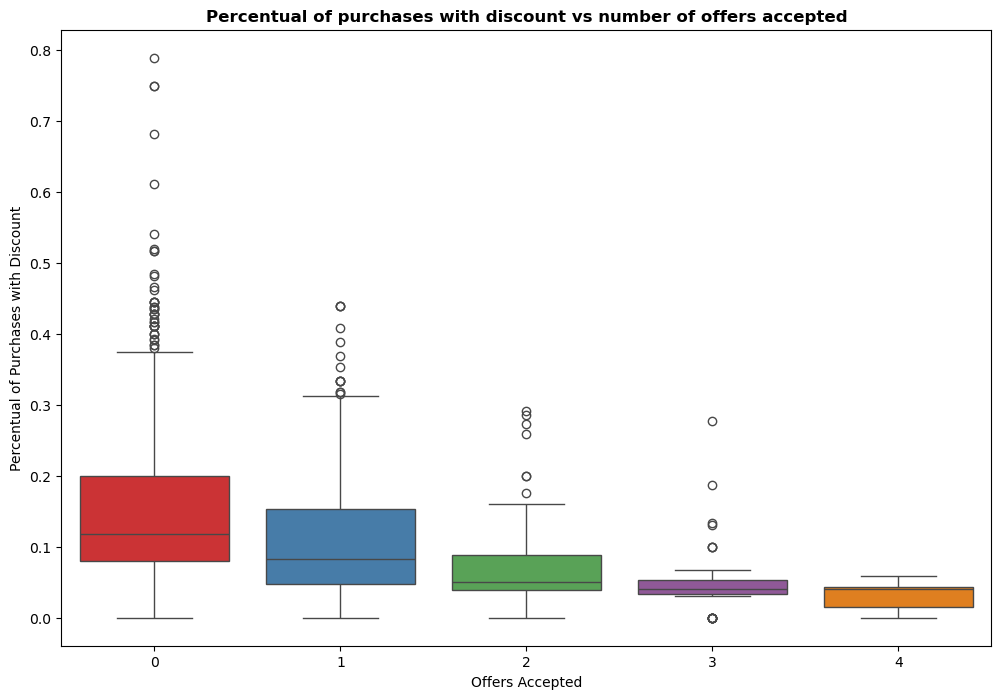

In [46]:
## Let's Check the Relationship between the "offers accepted" and the "percentual of purchases with discount"
df['accepted_sum']=df['accepted_cpm3']+df['accepted_cpm4']+df['accepted_cpm5']+df['accepted_cpm1']+df['accepted_cpm2']
plt.figure(figsize=(12,8))
plt.title("Percentual of purchases with discount vs number of offers accepted",fontweight='bold')
sns.boxplot(data=df,x='accepted_sum',y='pct_purchases_with_discount',palette='Set1')
plt.xlabel('Offers Accepted')
plt.ylabel('Percentual of Purchases with Discount')
plt.show()

#### That's not really what we expected : they gave an opposite correlation, Which doesn't make sense. I'm not going to use these "accepted~" features, Because of this incongruence,and because it's not really clear how they work: The description is: "1 if customer accepted the offer in the nst campaign, 0 otherwise". But what happens if the customer didn't receive all the offers (only received 3 of them, for example)? How can we guarantee that he saw that offers? What if he received more than 5 offers ? since this features are confusing I'll not use them, and use the "pct_purchases_with_discount" instead, that will give a similar idea, in a more straightforward way

In [49]:
### Dropping Columns : since we are going to use perform clusterization ahead, it's important that we only keep the
### most important features, since we don't want the clusters to be created based on attributes that 
### are not important to us

df=df.drop(['num_web_visits_month','recency', 'conplain', 'response', 'customer_id','dt_customer',
              'year_birth','kid_home','teen_home','mnt_wines', 'mnt_fruits','mnt_meat', 'mnt_fish', 
              'mtn_sweet', 'mnt_gold', 'num_web_purchases', 'num_catalog_purchases', 'num_store_purchases',
              'z_cost_contact','z_revenue', 'accepted_cpm3','accepted_cpm4', 'accepted_cpm5', 'accepted_cpm1',
              'accepted_cpm2', 'marital_status', 'accepted_sum'], axis = 1)

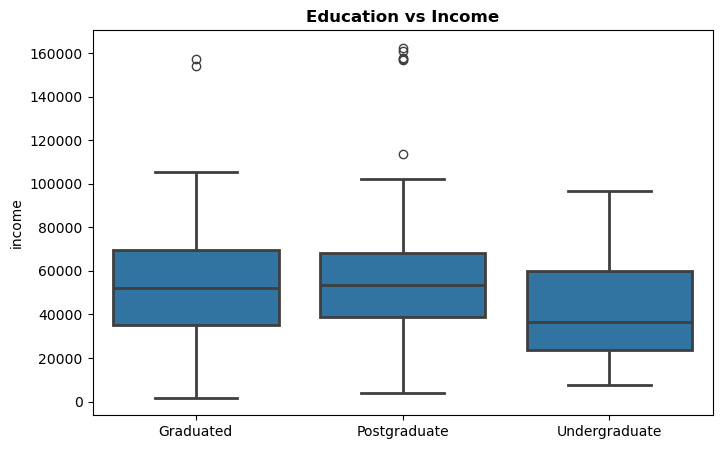

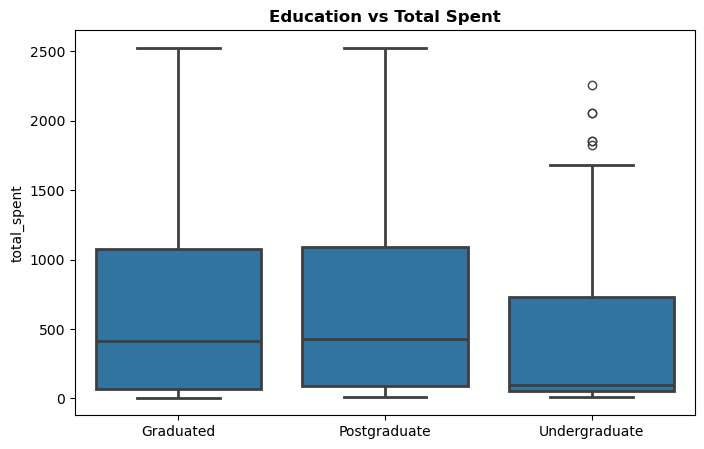

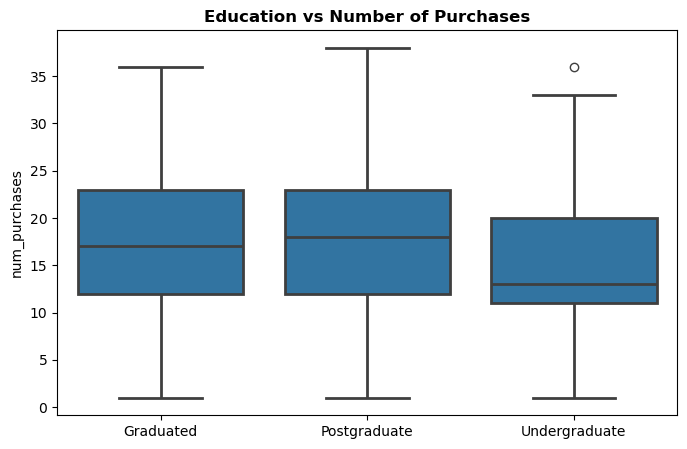

In [51]:
## Purchase Behaviour vs Education
plt.figure(figsize=(8,5))
plt.title("Education vs Income", fontweight = 'bold',fontsize=12)
sns.boxplot(y=df['income'],x=df['education'],linewidth=2)
plt.xlabel("")
plt.show()

plt.figure(figsize=(8,5))
plt.title("Education vs Total Spent", fontweight = 'bold',fontsize=12)
sns.boxplot(y=df['total_spent'],x=df['education'],linewidth=2)
plt.xlabel("")
plt.show()

plt.figure(figsize=(8,5))
plt.title("Education vs Number of Purchases", fontweight = 'bold',fontsize=12)
sns.boxplot(y=df['num_purchases'],x=df['education'],linewidth=2)
plt.xlabel("")
plt.show()

#### Looking at the Purchase Behaviour, it's fair to say that graduates and postgraduates have a very similar behaviour. Therefore, we'll put them in the same category 

In [54]:
df['education']=df['education'].replace({'Graduated':'Postgraduate'})
df['education']=df['education'].replace({'Postgraduate':1})
df['education']=df['education'].replace({'Undergraduate':0})
df.rename(columns={'education':'high_education'},inplace=True)

# Exploratory Data Analysis

#### Let's take a closer look at our remaining features, their distributions, and how they relate to each other

In [58]:
# Descriptive statistics
df.describe()

,high_education,income,num_deals_purchases,total_spent,pct_essentials,num_purchases,num_children,pct_purchases_with_discount,days_since_enrollment,age,relationship
count,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000
mean,0.885957,51961.906544,2.326029,605.986583,0.421153,17.866279,0.950805,0.136283,539.773256,46.101968,0.644902
std,0.317935,21411.404811,1.933032,601.865156,0.194116,6.547265,0.752204,0.094970,202.181561,11.703281,0.478650
min,0.000000,1730.000000,0.000000,5.000000,0.027523,1.000000,0.000000,0.000000,186.000000,19.000000,0.000000
25%,1.000000,35502.500000,1.000000,69.000000,0.263047,12.000000,0.000000,0.066667,366.750000,38.000000,0.000000
50%,1.000000,51684.000000,2.000000,396.500000,0.428571,17.000000,1.000000,0.111111,542.000000,45.000000,1.000000
75%,1.000000,68275.750000,3.000000,1045.500000,0.570302,23.000000,1.000000,0.181818,715.000000,56.000000,1.000000
max,1.000000,162397.000000,15.000000,2525.000000,0.998844,38.000000,3.000000,0.789474,885.000000,75.000000,1.000000


In [60]:
## We'll create an auxiliar column,to help us with the visualization. it will be deleted afterwards.
df['age_group']=df['age']//10*10

cat_columns = ['high_education','num_children','relationship','age_group']
num_columns= ['income','num_deals_purchases','total_spent','num_purchases','pct_purchases_with_discount','days_since_enrollment','pct_essentials']

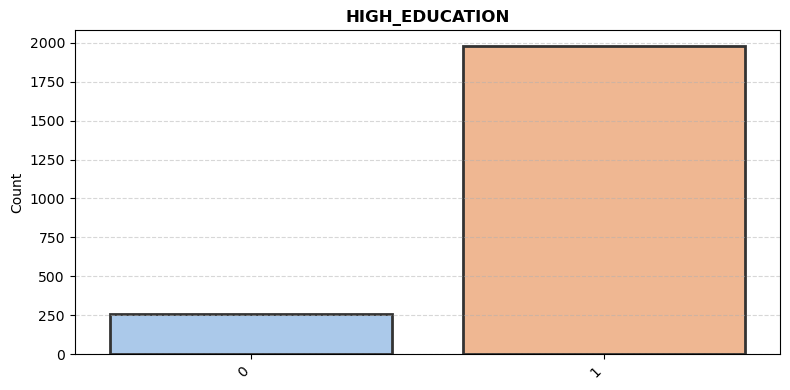

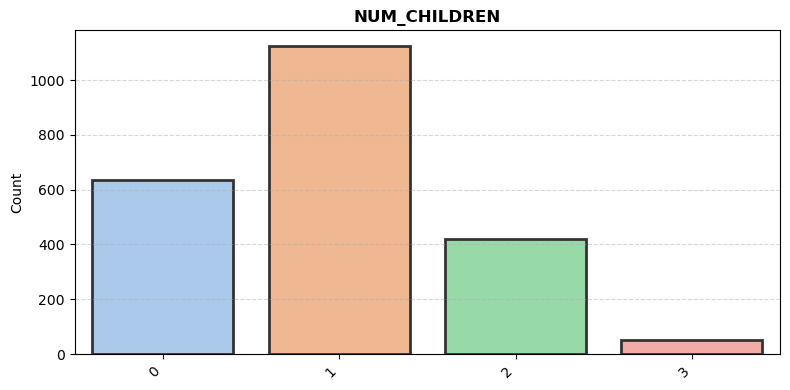

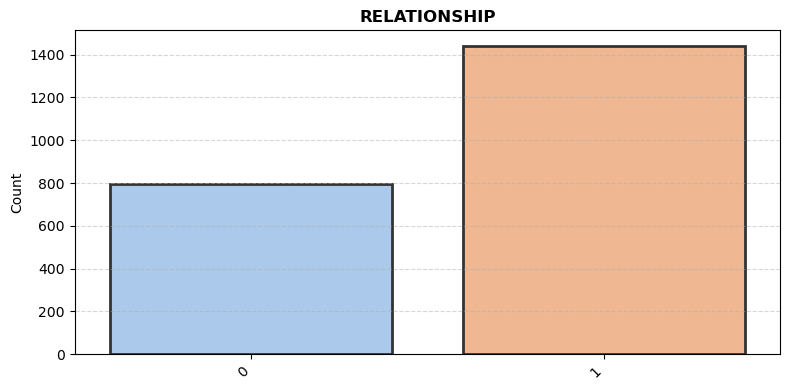

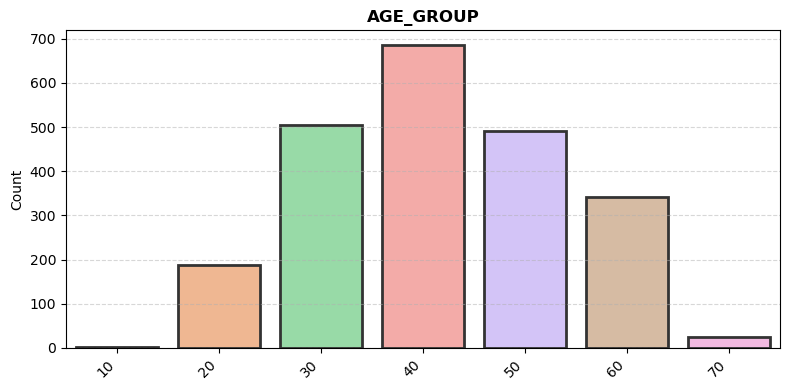

In [62]:
'''categorical distributions (even though num_children and age_group are numerical variables,
for practical effects it makes a lot of sense to make their visualization as categorical'''

for cat in cat_columns:
    plt.figure(figsize=(8, 4))
    plt.title(cat.upper(), fontweight='bold')

    # Group and rename count column
    aux = df.groupby(cat).size().reset_index(name='count')

    # Barplot
    sns.barplot(data=aux, x=cat, y='count', linewidth=2, edgecolor=".2", palette="pastel")

    plt.ylabel("Count")
    plt.xlabel(None)
    plt.xticks(rotation=45, ha='right')  # Rotate x labels if categories are long
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()


# Inference

### Most of the customers:
#### 1. Are in a Relationship
#### 2. Have a High Education(graduated or more)
#### 3. Have 1 Children
#### 4. Are between 30~60 years.

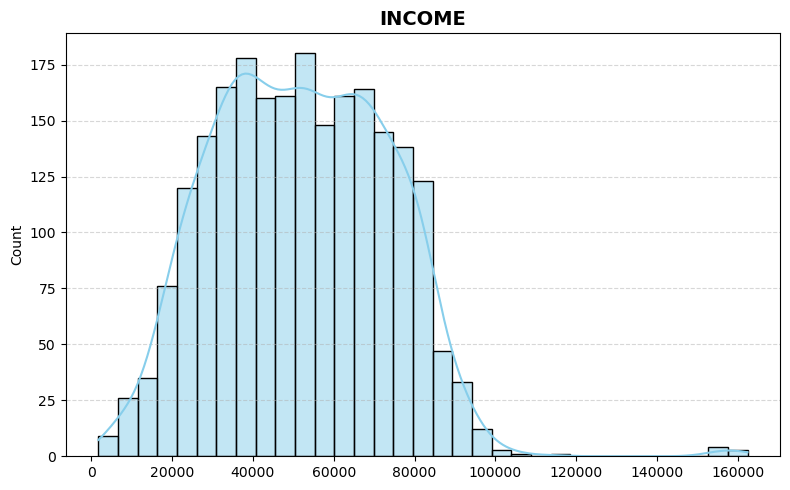

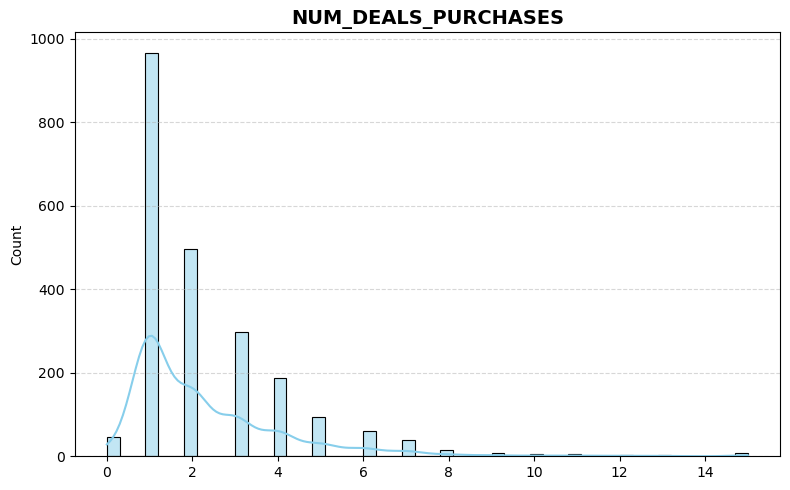

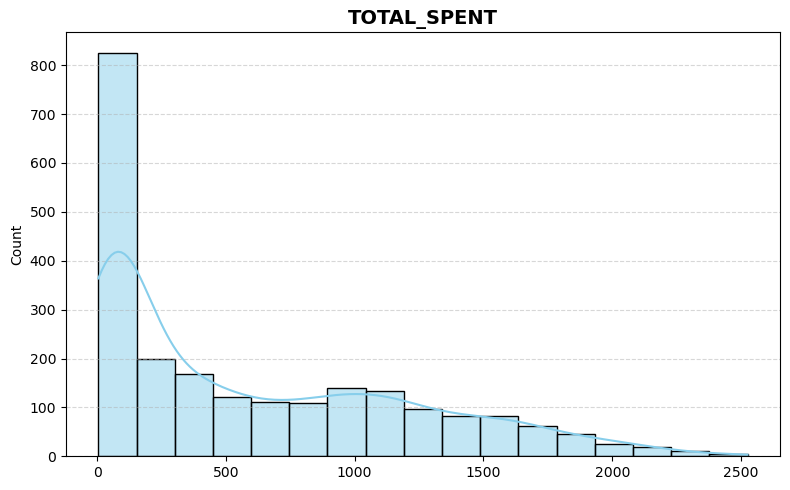

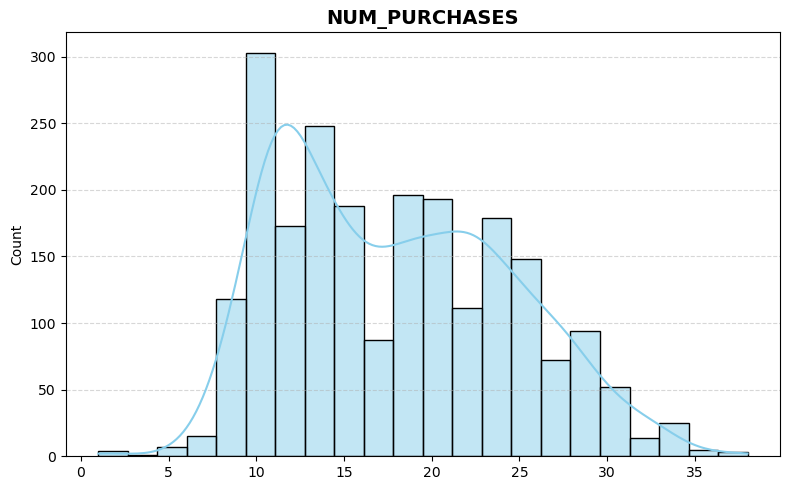

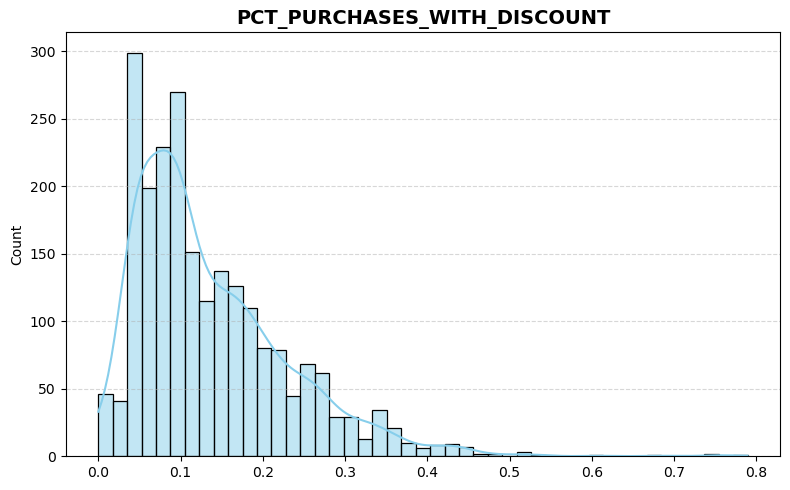

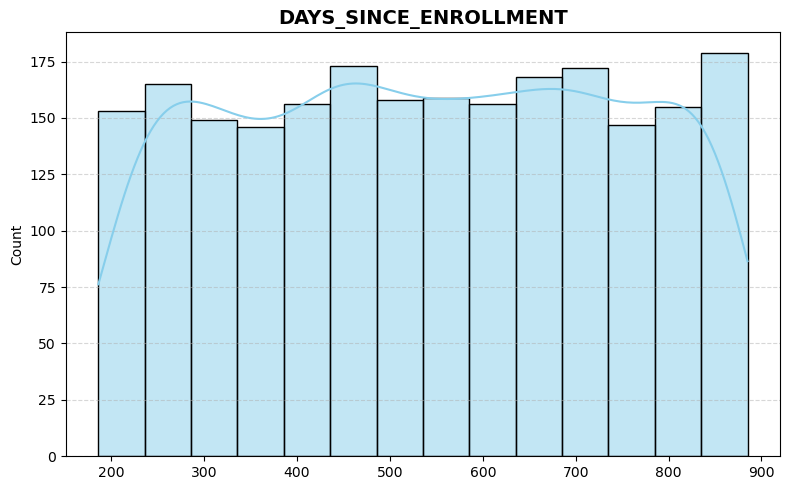

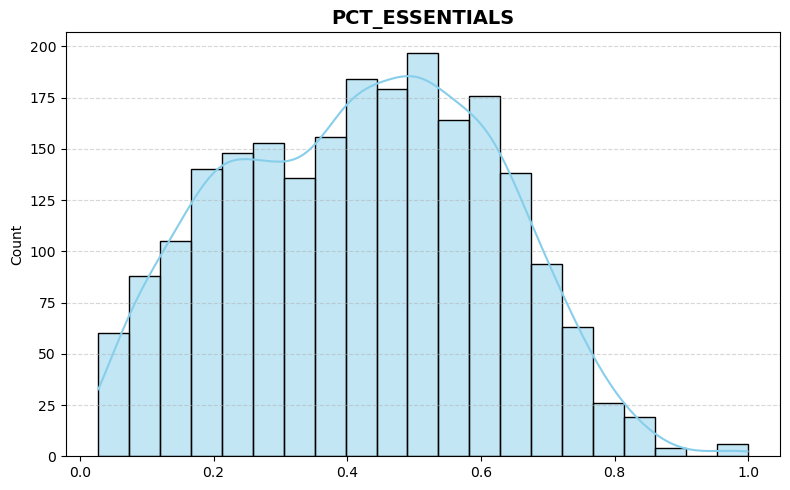

In [70]:
## Distribution of numerical variable


for num in num_columns:
    plt.figure(figsize=(8, 5))
    plt.title(num.upper(), fontweight='bold', fontsize=14)

    # Plot histogram with KDE (optional but useful for distribution shape)
    ax = sns.histplot(data=df, x=num, kde=True, color='skyblue', edgecolor='black')

    ax.set_xlabel("")  # Removes x-label if not needed
    ax.set_ylabel("Count")
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


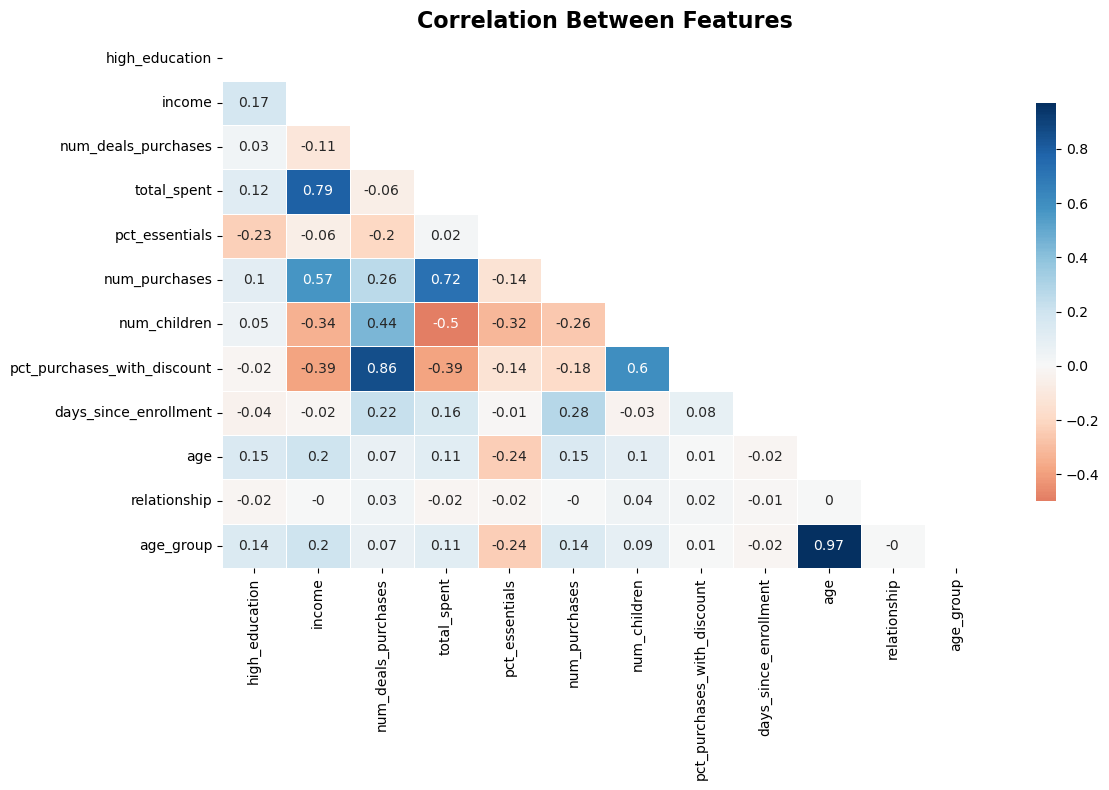

In [72]:
## Correlation matrix


# Compute correlation matrix
corr = df.corr(numeric_only=True)  # safer in case df has non-numeric columns

# Mask upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plot heatmap
plt.figure(figsize=(12, 8))
plt.title('Correlation Between Features', fontsize=16, fontweight='bold')
sns.heatmap(corr.round(2), annot=True, cmap="RdBu", mask=mask, center=0, 
            linewidths=0.5, cbar_kws={"shrink": 0.75})
plt.tight_layout()
plt.show()


##### Based on the correlation matrix, we can see a lot of variables that have a strong relationship. let's take a closer look:

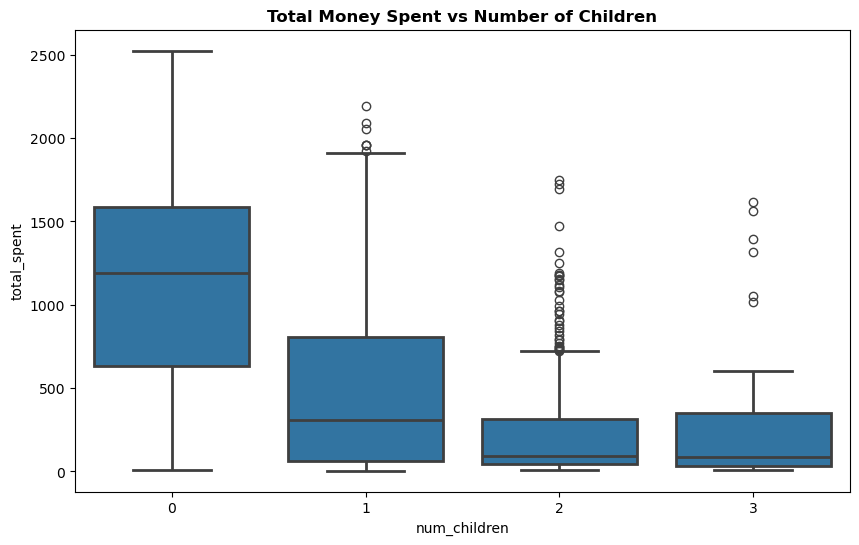

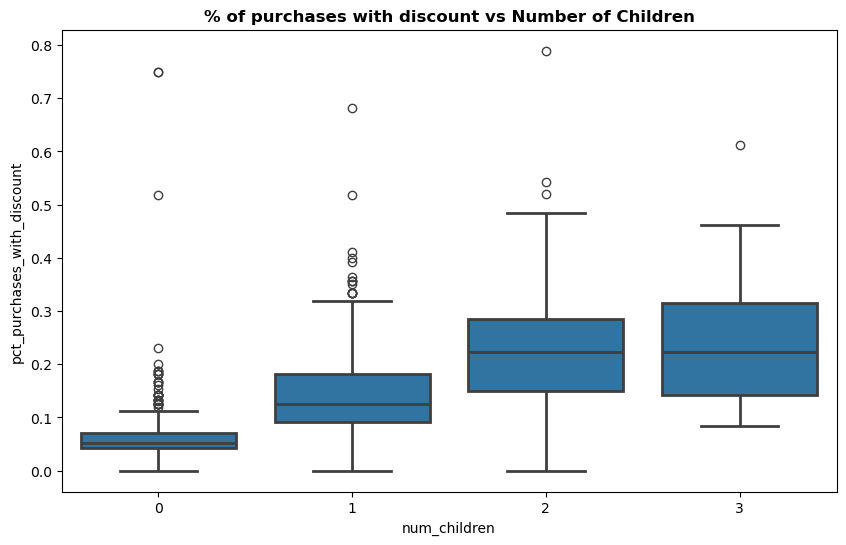

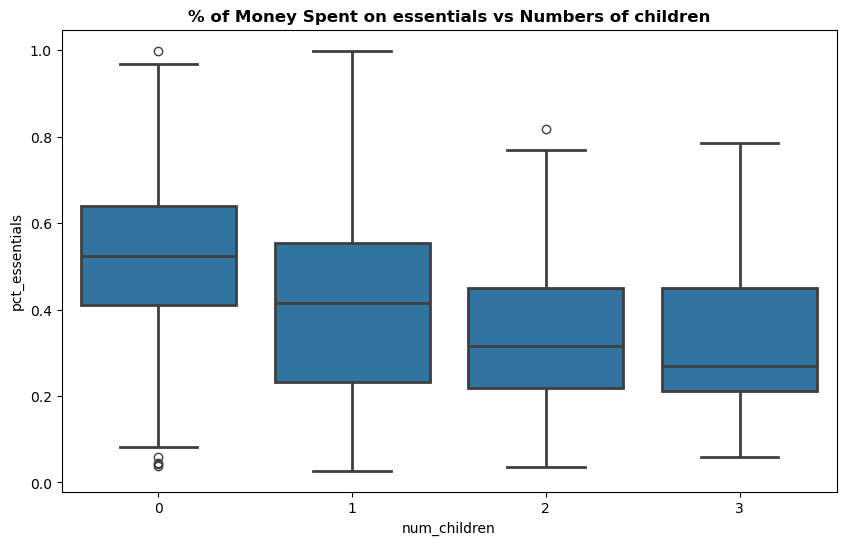

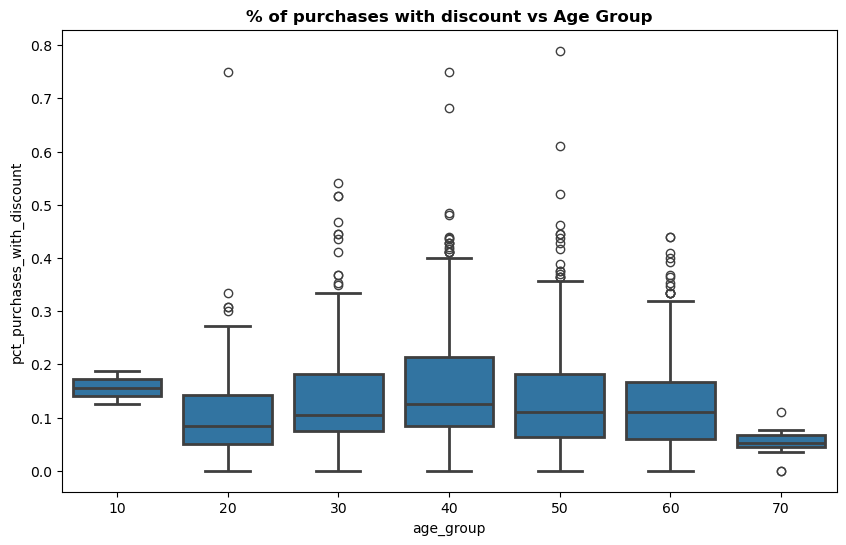

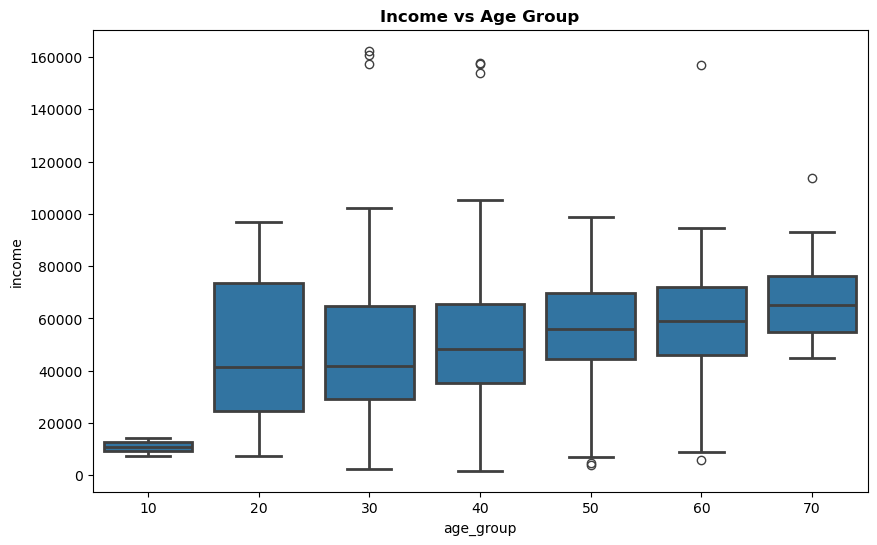

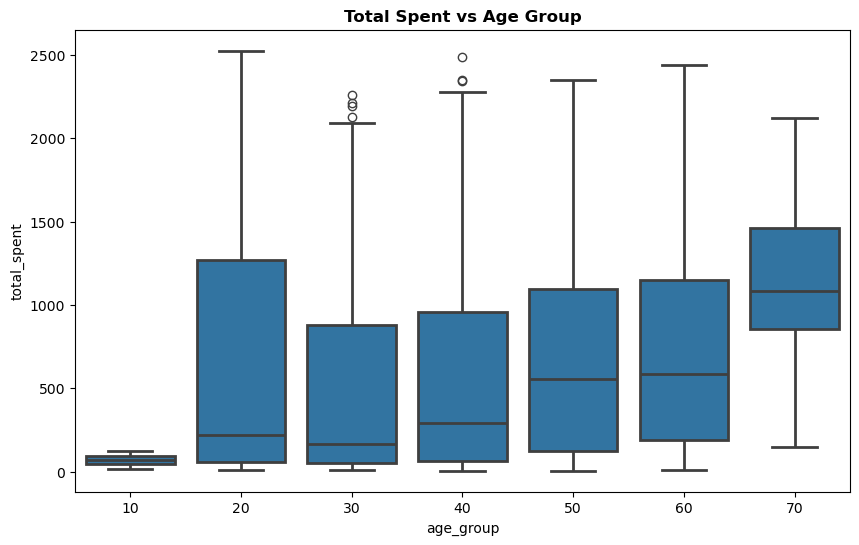

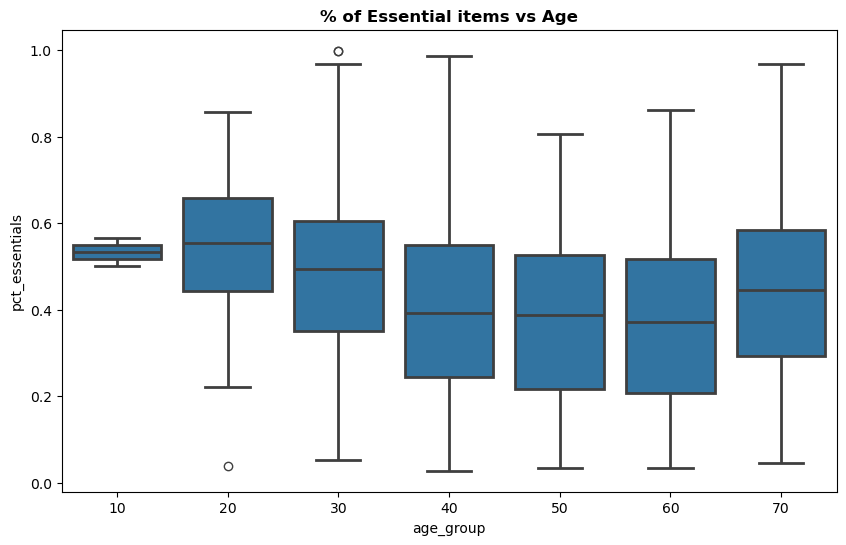

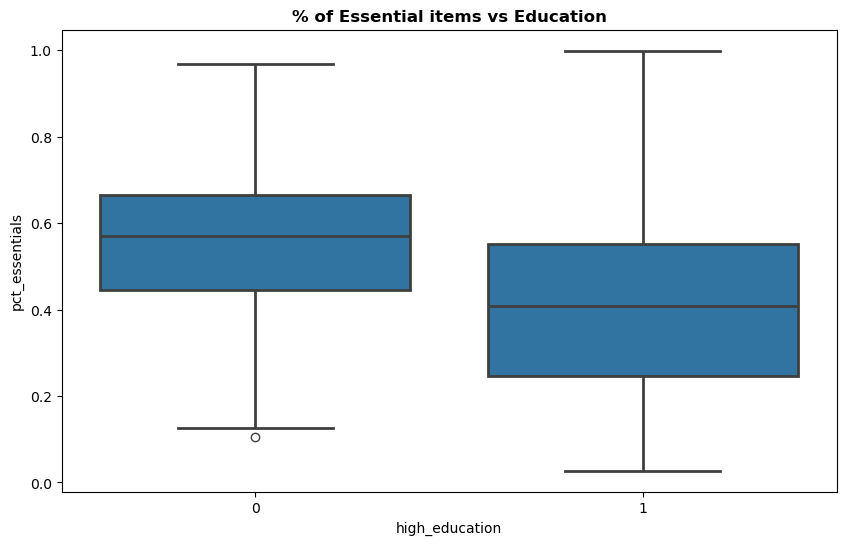

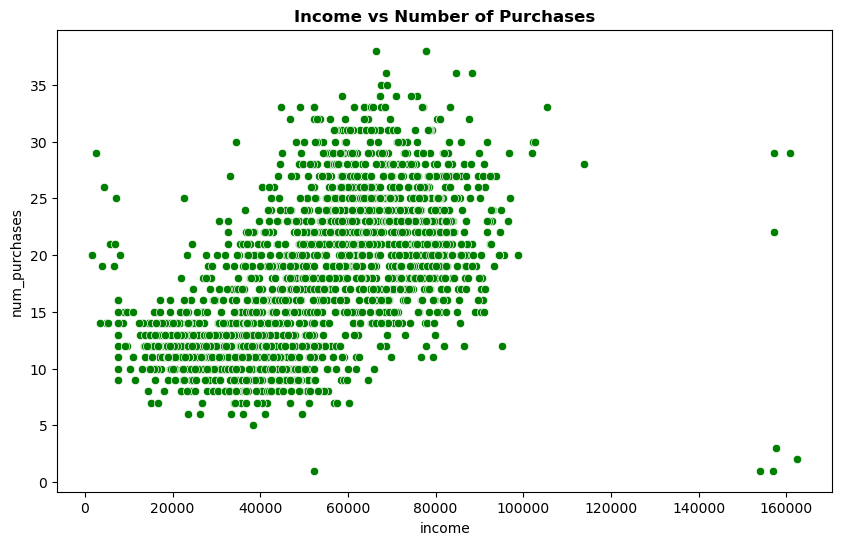

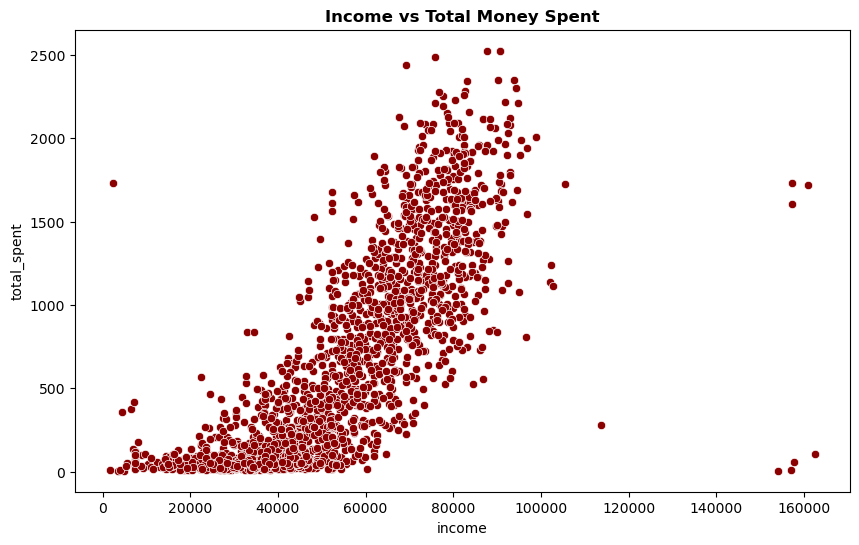

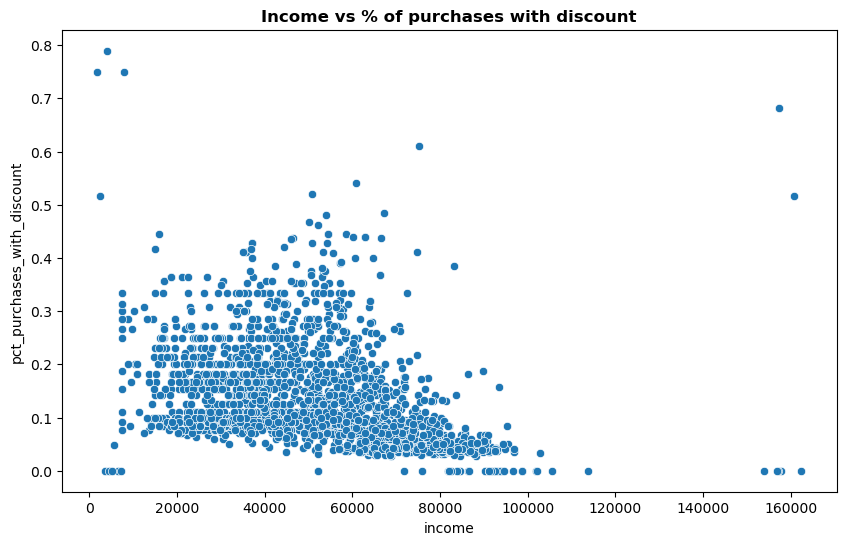

In [77]:
plt.figure(figsize=(10,6))
plt.title('Total Money Spent vs Number of Children',fontweight = 'bold')
sns.boxplot(data=df,y='total_spent',x='num_children',linewidth=2) 
plt.show()

plt.figure(figsize=(10,6))
plt.title("% of purchases with discount vs Number of Children",fontweight = 'bold')
sns.boxplot(data=df,y='pct_purchases_with_discount',x='num_children',linewidth=2) 
plt.show()

plt.figure(figsize=(10,6))
plt.title("% of Money Spent on essentials vs Numbers of children",fontweight = 'bold')
sns.boxplot(data=df,y='pct_essentials',x='num_children',linewidth=2) 
plt.show()

plt.figure(figsize=(10,6))
plt.title("% of purchases with discount vs Age Group",fontweight = 'bold')
sns.boxplot(data=df,y='pct_purchases_with_discount',x='age_group',linewidth=2) 
plt.show()

plt.figure(figsize=(10,6))
plt.title("Income vs Age Group",fontweight = 'bold')
sns.boxplot(data=df,y='income',x='age_group',linewidth=2) 
plt.show()

plt.figure(figsize=(10,6))
plt.title("Total Spent vs Age Group",fontweight = 'bold')
sns.boxplot(data=df,y='total_spent',x='age_group',linewidth=2) 
plt.show()

plt.figure(figsize=(10,6))
plt.title("% of Essential items vs Age",fontweight = 'bold')
sns.boxplot(data=df,y='pct_essentials',x='age_group',linewidth=2) 
plt.show()

plt.figure(figsize=(10,6))
plt.title("% of Essential items vs Education",fontweight = 'bold')
sns.boxplot(data=df,y='pct_essentials',x='high_education',linewidth=2) 
plt.show()

plt.figure(figsize = (10,6))
plt.title("Income vs Number of Purchases", fontweight = 'bold')
sns.scatterplot(data = df, x = 'income', y = 'num_purchases', color = 'green')
plt.show()

plt.figure(figsize = (10,6))
plt.title("Income vs Total Money Spent", fontweight = 'bold')
sns.scatterplot(data = df, x = 'income', y = 'total_spent', color = 'darkred')
plt.show()

plt.figure(figsize = (10,6))
plt.title("Income vs % of purchases with discount", fontweight = 'bold')
sns.scatterplot(data = df, x = 'income', y = 'pct_purchases_with_discount')
plt.show()

df = df.drop(['age_group', 'days_since_enrollment'], axis = 1)


#### From the visualizations, we can see some things: 
##### 1. People with no children: Spend less money, are less inclined to wait for discounts to buy their items and spend more money on essential
##### items(fruits,fish,meat,sweet).
##### 2. Older people have a Higher income
##### 3. People with higher income spend more money, and are less inclined to wait for discounts to buy their items.


# Clustering

### Standard Scaler

#### Some of the transformations on our data (PCA and Clustering) will envolve measuring distances. That can be problematic, considering that some features have very differnt ranges. We need to use The StandardScaler, so they can all have a similar range (mostly between -1 to 1)

In [83]:
### Standardization
sc=StandardScaler()
df_scaled=pd.DataFrame(sc.fit_transform(df),columns=df.columns)
display(df_scaled[:5].T)

,0,1,2,3,4
high_education,0.358780,0.358780,0.358780,0.358780,0.358780
income,0.288513,-0.262438,0.917992,-1.182621,0.295754
num_deals_purchases,0.348738,-0.168700,-0.686137,-0.168700,1.383614
total_spent,1.680176,-0.962202,0.282541,-0.918994,-0.305762
pct_essentials,0.678727,-0.261669,-0.124932,1.427092,0.687108
num_purchases,1.700895,-1.354499,0.937047,-0.896190,0.173198
num_children,-1.264308,1.395139,-1.264308,0.065416,0.065416
pct_purchases_with_discount,-0.345812,0.905113,-0.996495,0.320003,1.336247
age,1.016868,1.273264,0.333146,-1.290693,-1.034298
relationship,-1.347635,-1.347635,0.742041,0.742041,0.742041


# Principal Components Analysis(PCA)

#### In our dataset, We have a high number of features and a lot of them have a certain level of correlation between each other, and are somewhat reduntant. Performing a dimensionality reduction technique is a good option to reduce the number of features ,decreasing the computation cost of the algorithm, while maintaining the good amount of information from the original dataset.

#### This step is not mandatory , and is not really clear whether to use PCA before clustering really gives us better details. That is practically tricky, since clustering is the non- Supervisioned algorithm, which makes it harder to assess its performance

#### Now, Performing the PCA , We need to determine how many principal components we'll need to maintain about 70%~80% of variance of the original data

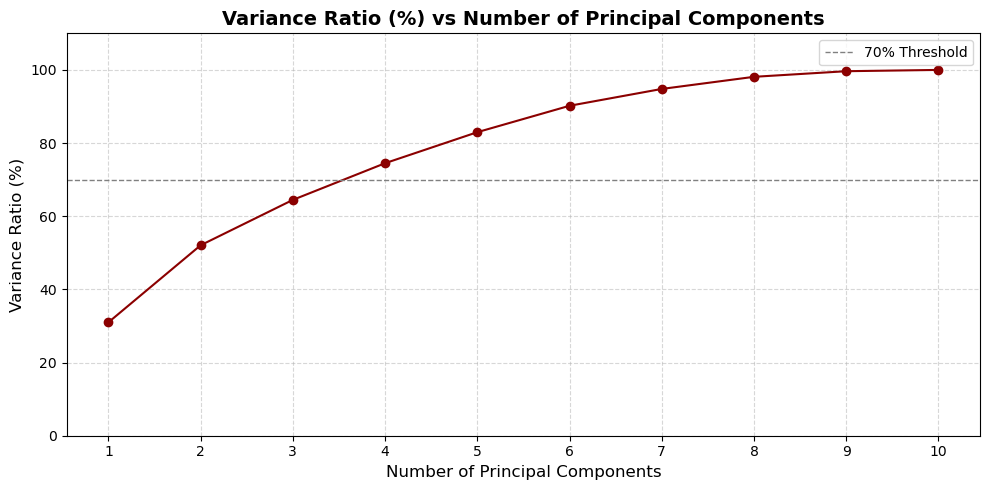

In [89]:
## Determining the number of principal components

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Explained variance storage
variance_ratio = {}

# Fit PCA with increasing number of components
for i in range(1, len(df_scaled.columns) + 1):
    pca = PCA(n_components=i)
    pca.fit(df_scaled)
    variance_ratio[i] = pca.explained_variance_ratio_.sum() * 100  # percentage

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(list(variance_ratio.keys()), list(variance_ratio.values()), marker='o', color='darkred')
plt.axhline(70, color='gray', ls='--', lw=1, label='70% Threshold')

plt.title("Variance Ratio (%) vs Number of Principal Components", fontsize=14, fontweight='bold')
plt.ylabel("Variance Ratio (%)", fontsize=12)
plt.xlabel("Number of Principal Components", fontsize=12)
plt.ylim([0, 110])
plt.xticks(range(1, len(df_scaled.columns) + 1))  # Show integer ticks
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


#### with 4 Principal components, we have almost 70% of the variance explained. Thats a good result.

In [92]:
# Applying PCA to create a new dataset with 4 principal components
pca=PCA(n_components=4,random_state =123)
pca.fit(df_scaled)
df_pca = pd.DataFrame(pca.transform(df_scaled),columns=(['PCA1','PCA2','PCA3','PCA4']))
df_pca.head(10)

,PCA1,PCA2,PCA3,PCA4
0,2.274351,1.038793,-0.657425,-1.394765
1,-1.873943,0.221423,1.444409,-1.300393
2,2.032854,-0.038882,0.403002,0.784897
3,-1.362291,-1.679339,-0.632087,0.542764
4,-0.935971,0.760547,-1.514053,0.494132
5,0.979444,0.880919,0.501325,0.799625
6,-0.003140,0.680897,-0.827462,-1.465404
7,-0.839718,-0.916329,-0.079205,0.639904
8,-0.578044,-1.760940,0.250323,0.674539
9,-1.236792,0.175796,2.292214,0.920289


#### Now we have a new dataset with the 4 Principal components. In the next step, we are going to apply the k-means on this new dataset

# K-Means

#### we are going to use the K-means algorithm to create our clusters. First, we'll need to determine the ideal number of clusters. We are going to compare two techniques: The elbow method and the silhouette score.

#### In the elbow method, we plot the WCSS vs the number of clusters. The WCSS is the sum of squared distance between each point and the centriod in a cluster. Naturally , as we increase the number of clusters, this value will always get smaller.

#### what we are looking for is a value of N that, from that point forward , the decrease of WCSS wont be very significative

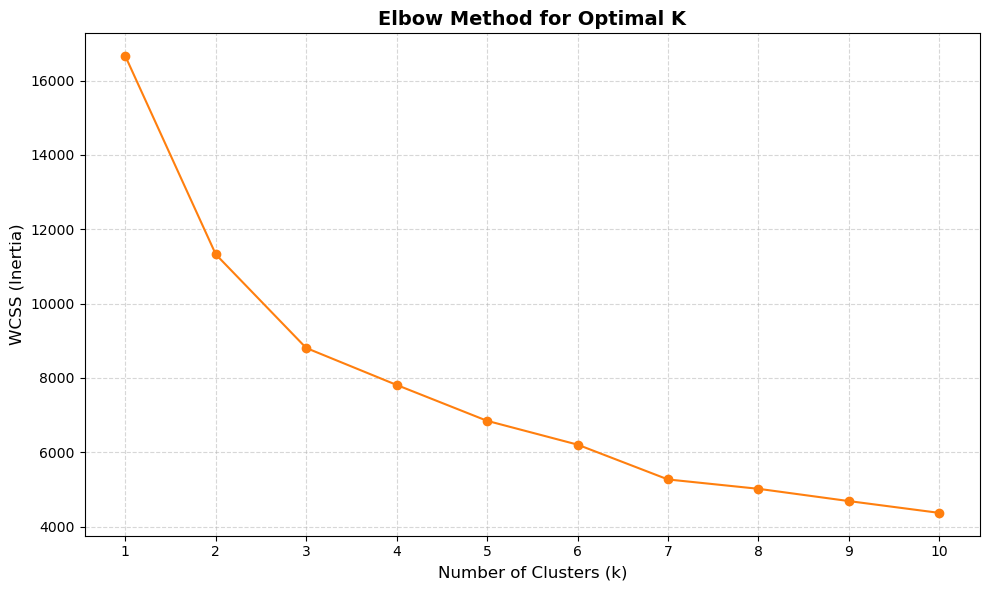

In [99]:
## Determining the ideal number of clusters: Elbow method

wcss = []
cluster_range = range(1, 11)

for i in cluster_range:
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=123)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, wcss, marker='o', color='tab:orange')
plt.title('Elbow Method for Optimal K', fontsize=14, fontweight='bold')
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('WCSS (Inertia)', fontsize=12)
plt.xticks(cluster_range)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


#### Taking a look at the curve , it's not really clear what is the ideal number of clusters. Let's double check it with the silhouette scores. The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).

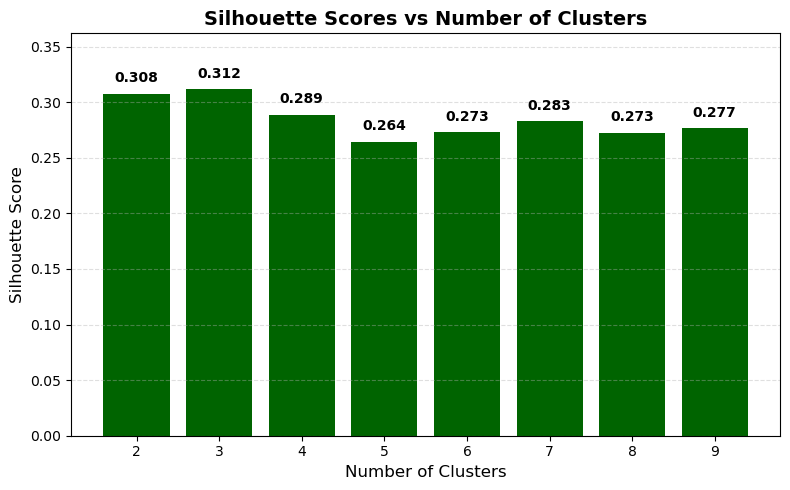

In [102]:

silhouette_scores = []

# Try different cluster sizes
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, random_state=123)
    labels = kmeans.fit_predict(df_pca)
    score = silhouette_score(df_pca, labels)
    silhouette_scores.append(score)

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(range(2, 10), silhouette_scores, color='darkgreen')
plt.title("Silhouette Scores vs Number of Clusters", fontsize=14, fontweight='bold')
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.ylim(0, max(silhouette_scores) + 0.05)
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Annotate scores on top of bars
for i, score in enumerate(silhouette_scores, start=2):
    plt.text(i, score + 0.01, f"{score:.3f}", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


#### That Settles: We are going to use the K-means with the 3 clusters , and add the results to the original dataset.

In [126]:
kmeans = KMeans(n_clusters=3, random_state=123).fit(df_pca)
pred = kmeans.predict(df_pca)
df['cluster'] = pred + 1
df.head()

,high_education,income,num_deals_purchases,total_spent,pct_essentials,num_purchases,num_children,pct_purchases_with_discount,age,relationship,cluster
0,1,58138.0,3,1617,0.552876,29,0,0.103448,58,0,2
1,1,46344.0,2,27,0.370370,9,2,0.222222,61,0,1
2,1,71613.0,1,776,0.396907,24,0,0.041667,50,1,2
3,1,26646.0,2,53,0.698113,12,1,0.166667,31,1,1
4,1,58293.0,5,422,0.554502,19,1,0.263158,34,1,3


# Analyzing the Clusters

#### Now, Lets compare the clusters:


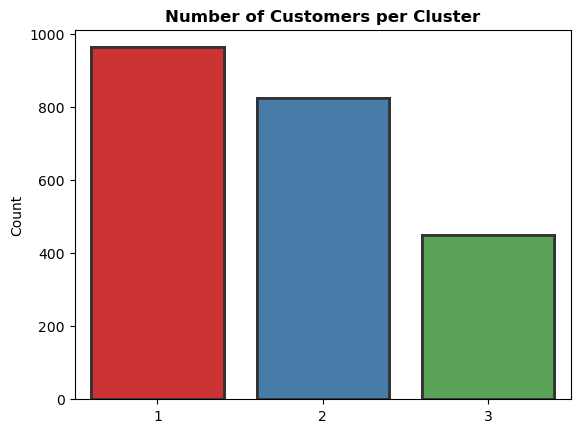

In [121]:
aux = df.cluster.value_counts()/len(df.count())
plt.title('Number of Customers per Cluster', fontweight = 'bold')
aux = df.groupby('cluster').size().reset_index()#.rename({'pct_essentials':'count'}, axis = 1)
ax = sns.barplot(x='cluster', data=aux, y = 0, linewidth=2, edgecolor=".2",  palette = 'Set1').set(ylabel="Count", xlabel = None)
plt.show()

In [115]:
# Step 1: Cluster-wise mean values
clusters_evaluation = df.groupby('cluster').mean(numeric_only=True).T

# Step 2: Add overall dataset mean for comparison
clusters_evaluation['mean_dataset'] = df.mean(numeric_only=True)

# View the comparison
clusters_evaluation


cluster,1,2,3,mean_dataset
high_education,0.827622,0.928311,0.933333,0.885957
income,35004.772603,72416.462037,50841.063910,51961.906544
num_deals_purchases,1.711319,1.460510,5.224444,2.326029
total_spent,108.835929,1224.676792,538.373333,605.986583
pct_essentials,0.454990,0.445125,0.304901,0.421153
num_purchases,12.330218,22.888214,20.528889,17.866279
num_children,1.131880,0.402187,1.566667,0.950805
pct_purchases_with_discount,0.139721,0.063968,0.261181,0.136283
age,42.856698,47.876063,49.802222,46.101968
relationship,0.651090,0.619684,0.677778,0.644902


In [134]:
plt.figure(figsize = (8,8))
clusters_evaluation.drop('mean_dataset', axis = 1).style.background_gradient(cmap='RdYlGn',axis=1)

cluster,1,2,3
high_education,0.827622,0.928311,0.933333
income,35004.772603,72416.462037,50841.063910
num_deals_purchases,1.711319,1.460510,5.224444
total_spent,108.835929,1224.676792,538.373333
pct_essentials,0.454990,0.445125,0.304901
num_purchases,12.330218,22.888214,20.528889
num_children,1.131880,0.402187,1.566667
pct_purchases_with_discount,0.139721,0.063968,0.261181
age,42.856698,47.876063,49.802222
relationship,0.651090,0.619684,0.677778


#### From the table above, we can identify clear differences between the clusters. At first glance, income and spending behavior are key differentiators:

#### Cluster 1 consists of low-income, younger customers who purchase less and spend the least.

#### Cluster 2 contains high-income customers with moderate spending and the highest number of purchases.

#### Cluster 3 includes medium-income, older customers who spend the most, use discounts and deals more actively, and make frequent purchases.

#### Let's make some more visualizations, to get some more insights.

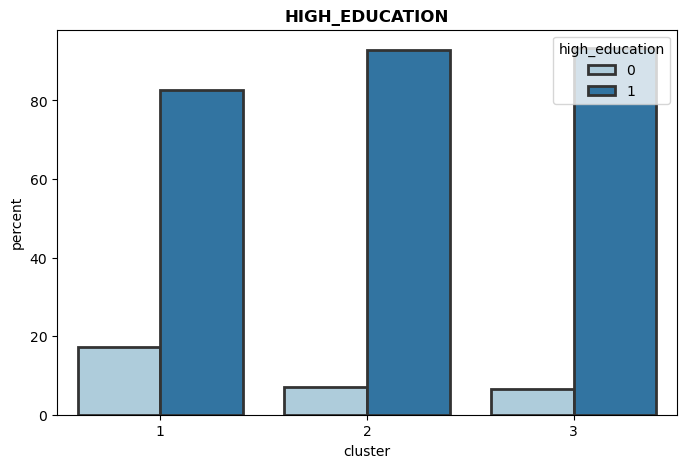

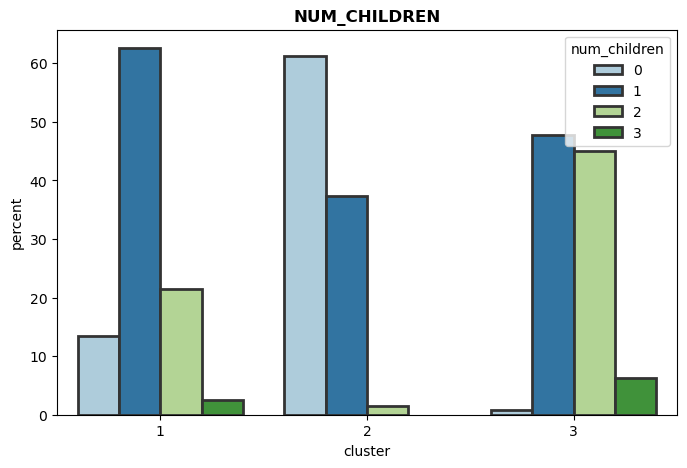

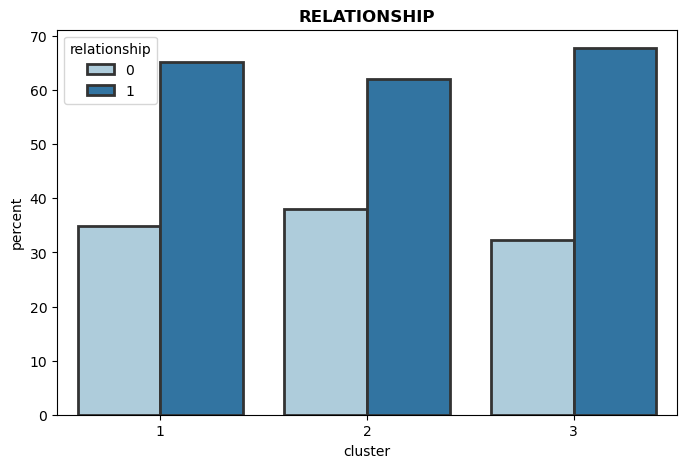

In [144]:
## Categorical Visualizations

cat_columns = ['high_education','num_children', 'relationship']
num_columns = ['income','total_spent','num_purchases', 
       'pct_purchases_with_discount', 'age', 'pct_essentials']

for cat in cat_columns:
    plt.figure(figsize = (8,5))
    plt.title(str.upper(cat), fontweight = 'bold')
    df_aux = df.groupby('cluster')[cat].value_counts(normalize=True).mul(100).rename('percent').reset_index()
    sns.barplot(data = df_aux, x='cluster',y='percent',hue=cat, palette = 'Paired',linewidth=2, edgecolor=".2");
    plt.show() 

# Notes:

## Most of the users without high-education falls into the cluster 2
## Most users in Cluster 1 have at least 1 child, with a significant proportion having 1 or 2 children, but a minority still have no children.
## Users in Cluster 3 mostly have 1 or 2 children, with very few having 0 or 3 children.

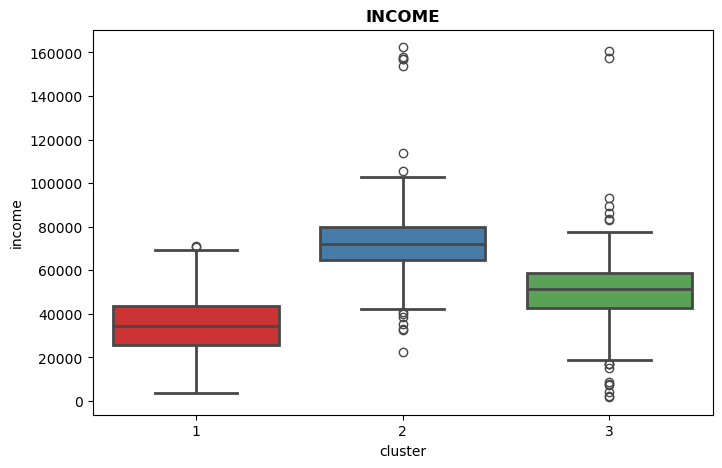

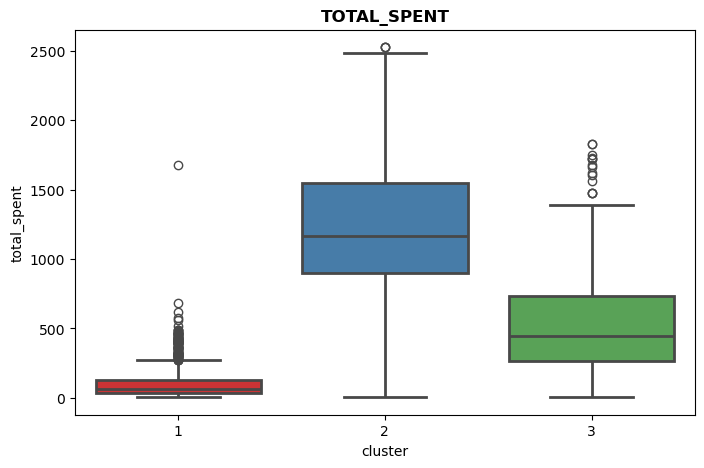

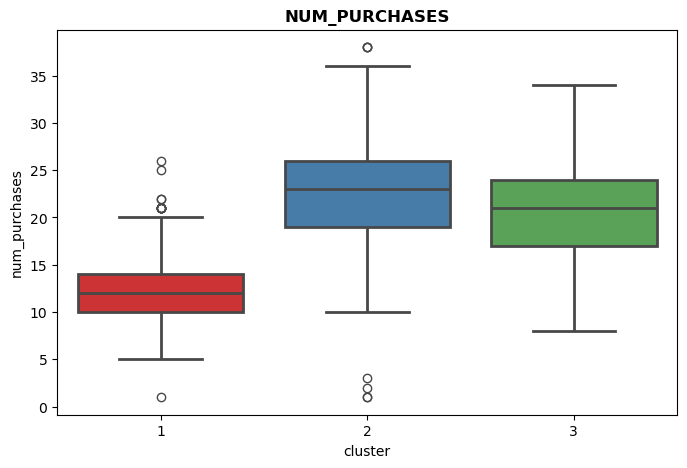

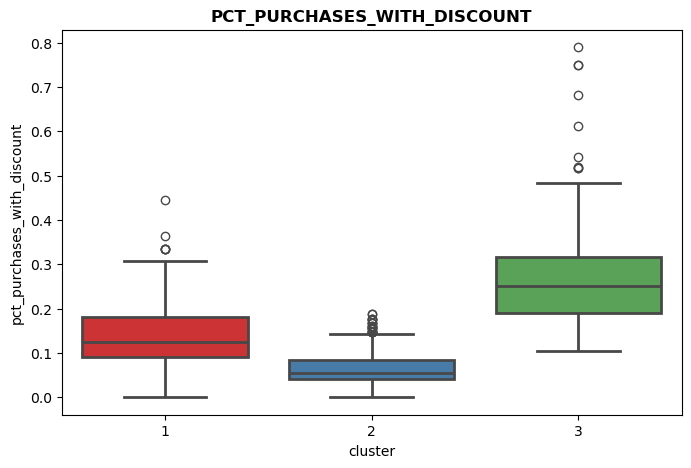

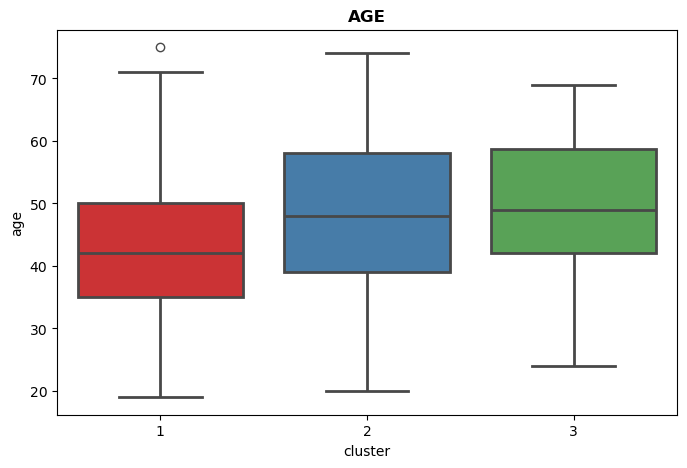

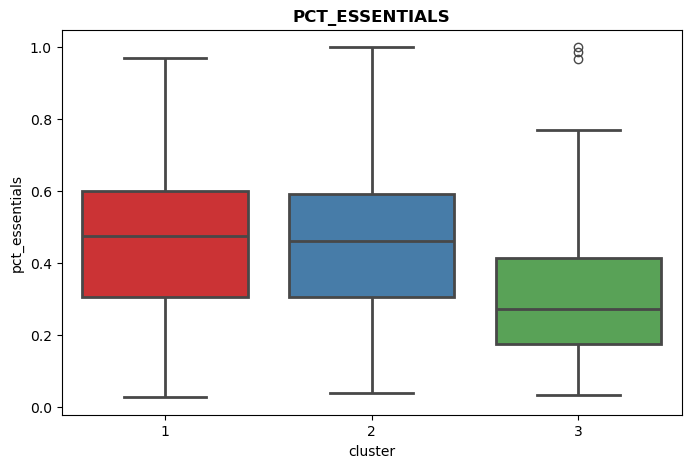

In [146]:
## Numerical Variables

for num in num_columns:
    plt.figure(figsize = (8,5))
    plt.title(str.upper(num), fontweight = 'bold')
    ax = sns.boxplot(y=num, x = 'cluster', data=df, palette = 'Set1', linewidth = 2)#.set(ylabel="Count", xlabel = None)
    plt.show()


# Cluster 1: Price-Conscious Essentials Buyer (Low Income)
### Income: Low
### Total Spent: Low
### Discount Usage: Moderate
### Purchase Type: Mostly essential items
### Age: Relatively older



# Cluster 2: Premium Young Spender (High Income)
### Income: High
### Total Spent: High
### Discount Usage: Rarely uses discounts
### Purchase Type: Mix of essentials and non-essentials
### Age: Youngest group among all clusters

# Cluster 3: Value-Seeking Balanced Shopper (Medium Income)
### Income: Medium
### Total Spent: Medium
### Discount Usage: Frequently buys on discount
### Purchase Type: More non-essential items (e.g., wine, gold)
###  Age: Older

##### Other important visualizations

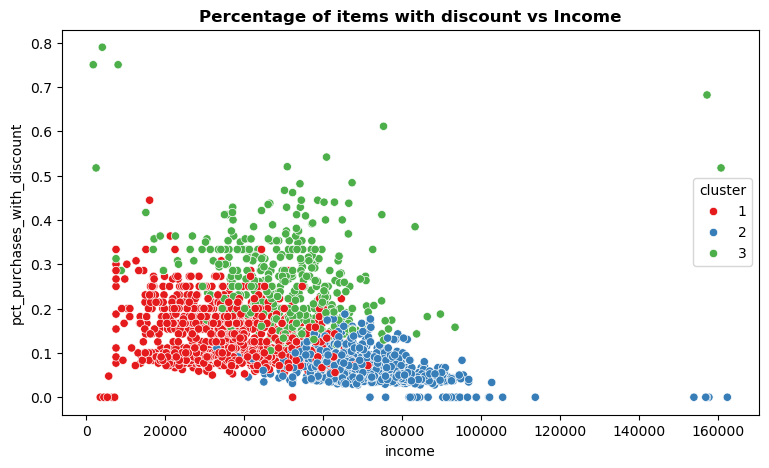

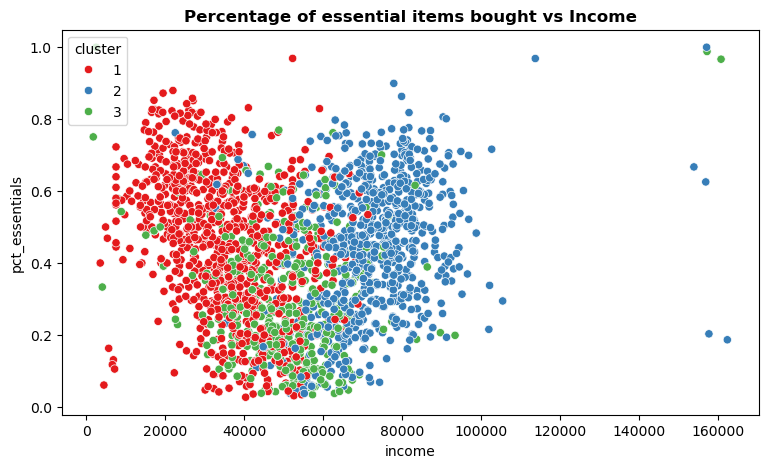

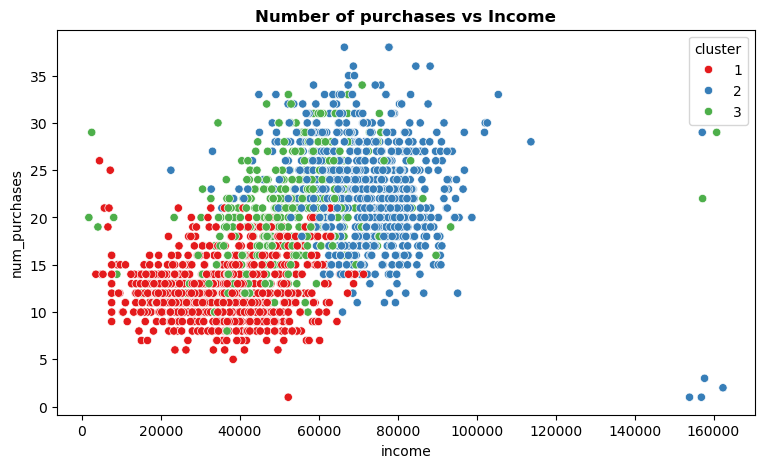

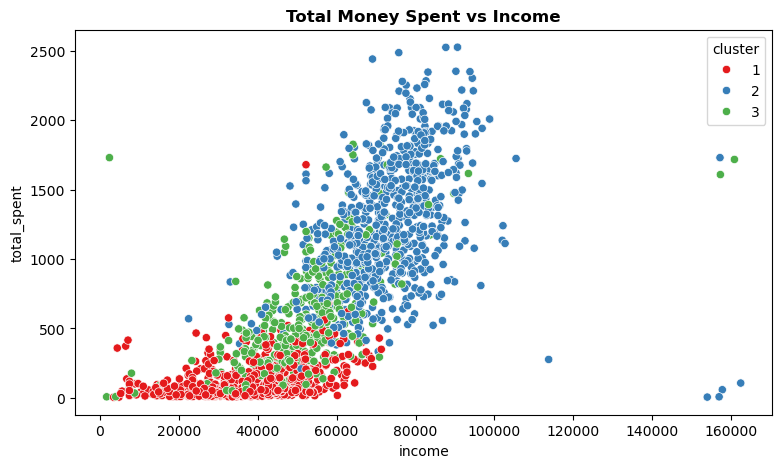

In [150]:
plt.figure(figsize = (9,5))
plt.title('Percentage of items with discount vs Income', fontweight = 'bold')
sns.scatterplot(data = df, x = 'income', y = 'pct_purchases_with_discount', hue = 'cluster', palette = 'Set1')
plt.show()

plt.figure(figsize = (9,5))
plt.title('Percentage of essential items bought vs Income', fontweight = 'bold')
sns.scatterplot(data = df, x = 'income', y = 'pct_essentials', hue = 'cluster', palette = 'Set1')
plt.show()

plt.figure(figsize = (9,5))
plt.title('Number of purchases vs Income', fontweight = 'bold')
sns.scatterplot(data = df, x = 'income', y = 'num_purchases', hue = 'cluster', palette = 'Set1')
plt.show()

plt.figure(figsize = (9,5))
plt.title('Total Money Spent vs Income', fontweight = 'bold')
sns.scatterplot(data = df, x = 'income', y = 'total_spent', hue = 'cluster', palette = 'Set1')
plt.show()

# Conclusions

### Cluster 1:
#### 1. About 36% of customers
#### 2. High Income Group
#### 3. Almost all have 0 or 1 children
#### 4. spend a lot of money overall
#### 5. Make Fewer purchases, but high in value
#### 6. Not sensitive to discounts
#### 7. Buy Fewer essential items

### Cluster 2:
#### 1. Largest group (about 44%)
#### 2. Medium to high income
#### 3. Spend the most overall
#### 4. Make the most purchases
#### 5. Not sensitive to discounts
#### 6. % of essentials purchased is around average


### Cluster 3:
#### 1. Smallest group (about 20%)
#### 2. Low to medium income
#### 3. Everyone has at least 1 child
#### 4. Highly sensitive to discounts
#### 5. Mostly buy non-essential items (like wine and gold)
#### 6. Spend a moderate amount
#### 7. Make a moderate number of purchases

## Strategic Insight:
### We observe a strong relationship between discount sensitivity and customer clusters:

#### Cluster 3 is the most responsive to discounts and focuses on non-essentials → Target with special offers and promotions.

#### Cluster 1 shows little interest in discounts → Avoid spending marketing efforts here on deals.

#### Cluster 2 is not discount-driven either, but contributes significantly to revenue through volume → Could be targeted with loyalty programs instead.



# Therefore, it would be a good idea to focus special discount offers on customers in Cluster 3. On the other hand, customers in Cluster 1 are not very responsive to discounts, so marketing efforts involving discounts might not be effective for them.